In [2]:
import time

def f(x):
    x1 = x[0]
    x2 = x[1]
    return 100*(x2**2-2*x2*x1**2+x1**4)+(1-2*x2+x2**2)

def pt_gen(x, positive_sign):
    x1 = x[0]
    x2 = x[1]
    if positive_sign == 1:
        return [400*x1**3-400*x1*x2, 202*x2-200*x1**2-2]
    return [-400*x1**3+400*x1*x2, -202*x2+200*x1**2+2]


def definite_pt(pt):
    return pt[0]*pt[0]+pt[1]*pt[1]

# Backtracking Line Search Algorithm
def bls(x, a, t, c, pt):
    gradient = pt_gen(x, 1)
    while f([ x[0] + a*pt[0] , x[1] + a*pt[1] ]) > f(x) + c*a*(gradient[0] * pt[0] + gradient[1] * pt[1]):
        a = t*a
    return a

# Vectors
x = [1.8, 1.8]
pt = pt_gen(x, -1)
pt_o = pt

# Factors. You may change this part.
c = 0.5
alpha = 0.5
tau = 0.5
T = 1E-8



i = 0 # iterator

print("Timer start.")
start = time.time()
while definite_pt(pt)/definite_pt(pt_o) > T: # origin : ||gradient f(x)|| / ||gradient f(x0)|| < T for contant T

    pt = pt_gen(x, -1)
    print ( "iter: " + str(i) + "    x1: " + str(round(x[0],4)) + "    x2: " + str(round(x[1],4)) + "    f(x): " + str(round(f(x),4)))

    alpha = bls(x, alpha, tau, c, pt_gen(x, -1))
    x[0] = x[0] + alpha*pt[0] # x_1 = x_0 + alpha_0 * p_0
    x[1] = x[1] + alpha*pt[1]
    

    i += 1

print("Timer end. Each iteration time is : ", (time.time() - start)/i)


Timer start.
iter: 0    x1: 1.8    x2: 1.8    f(x): 208.0
iter: 1    x1: 1.5469    x2: 1.8699    f(x): 28.0992
iter: 2    x1: 1.4679    x2: 1.895    f(x): 7.5432
iter: 3    x1: 1.4307    x2: 1.9073    f(x): 2.7699
iter: 4    x1: 1.4112    x2: 1.9136    f(x): 1.4394
iter: 5    x1: 1.4005    x2: 1.917    f(x): 1.0369
iter: 6    x1: 1.3944    x2: 1.9187    f(x): 0.9098
iter: 7    x1: 1.3909    x2: 1.9195    f(x): 0.8683
iter: 8    x1: 1.3889    x2: 1.9198    f(x): 0.8543
iter: 9    x1: 1.3876    x2: 1.9198    f(x): 0.8493
iter: 10    x1: 1.3868    x2: 1.9196    f(x): 0.8471
iter: 11    x1: 1.3863    x2: 1.9194    f(x): 0.8459
iter: 12    x1: 1.386    x2: 1.919    f(x): 0.845
iter: 13    x1: 1.3857    x2: 1.9187    f(x): 0.8442
iter: 14    x1: 1.3855    x2: 1.9183    f(x): 0.8435
iter: 15    x1: 1.3853    x2: 1.9179    f(x): 0.8427
iter: 16    x1: 1.3852    x2: 1.9175    f(x): 0.842
iter: 17    x1: 1.385    x2: 1.9171    f(x): 0.8413
iter: 18    x1: 1.3849    x2: 1.9168    f(x): 0.8406
ite

### gradient_descent

Optimized values: [3.99999974 1.80548773]


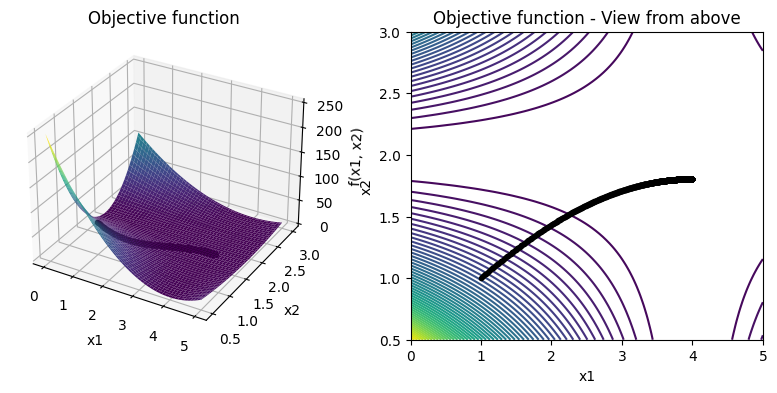

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def f(x1, x2):
    return 7 * (x1 - 4)**2 * (x2 - 2)**2

def gradient(x1, x2):
    dfdx1 = 14 * (x1 - 4) * (x2 - 7)**2
    dfdx2 = 14 * (x1 - 4)**2 * (x2 - 7)
    return np.array([dfdx1, dfdx2])

def plot_function_and_points(f, points):
    # Define a meshgrid for the function domain
    x1_range = np.linspace(0, 5, 100)
    x2_range = np.linspace(0.5, 3, 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)

    # Evaluate the function on the meshgrid
    f_grid = f(x1_grid, x2_grid)

    # Plot the function and points
    fig = plt.figure(figsize=(10, 4))
    
    # Plot the first graph
    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(x1_grid, x2_grid, f_grid, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title('Objective function')
    ax.plot(points[:, 0], points[:, 1], f(points[:, 0], points[:, 1]), marker='.', color='k')
    
    # Plot the second graph
    ax2 = fig.add_subplot(122)
    ax2.contour(x1_grid, x2_grid, f_grid, 50, cmap='viridis')
    ax2.plot(points[:, 0], points[:, 1], marker='.', color='k')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Objective function - View from above')
    
    plt.show()

def gradient_descent(f, gradient, x0, alpha=1e-5, tol=1e-9, max_iter=1000000):
    x = x0
    points = [x]  # list to store the history of x values
    for _ in range(max_iter):
        grad = gradient(x[0], x[1])
        delta_x = -alpha * grad
        x = x + delta_x
        points.append(x)  # add the new point to the list
        if np.linalg.norm(delta_x) < tol:
            break
    points = np.array(points)
    return x, points

x0 = np.array([1.0, 1.0])  # Initial guess
x_opt, points = gradient_descent(f, gradient, x0)
print("Optimized values:", x_opt)

plot_function_and_points(f, points)


### Newton

Минимум функции: [3.99797249 6.99593729]
Значение функции в минимуме: 4.749585582180132e-10


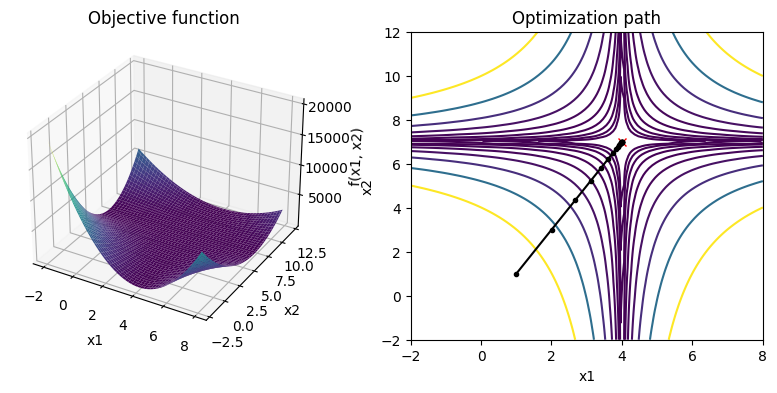

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x):
    x1, x2 = x
    return 7 * (x1 - 4)**2 * (x2 - 7)**2

def df(x, eps=1e-6):
    x1, x2 = x
    df_x1 = (f([x1 + eps, x2]) - f([x1 - eps, x2])) / (2*eps)
    df_x2 = (f([x1, x2 + eps]) - f([x1, x2 - eps])) / (2*eps)
    return np.array([df_x1, df_x2])

def ddf(x, eps=1e-6):
    x1, x2 = x
    ddf_x11 = (f([x1 + eps, x2]) - 2*f([x1, x2]) + f([x1 - eps, x2])) / (eps**2)
    ddf_x22 = (f([x1, x2 + eps]) - 2*f([x1, x2]) + f([x1, x2 - eps])) / (eps**2)
    ddf_x12 = (f([x1 + eps, x2 + eps]) - f([x1 + eps, x2 - eps]) - f([x1 - eps, x2 + eps]) + f([x1 - eps, x2 - eps])) / (4*eps**2)
    return np.array([[ddf_x11, ddf_x12], [ddf_x12, ddf_x22]])

def newton_optimizer(f, df, ddf, x0, tol=1e-6, max_iter=100):
    """
    Реализация оптимизационного метода Ньютона для минимизации функции f(x1,x2) = 7 * (x1 - 4)**2 * (x2 - 7)**2.
    """
    x = x0
    path = [x]
    for i in range(max_iter):
        fx = f(x)
        if np.linalg.norm(df(x)) < tol:
            return x, path
        J = ddf(x)
        dx = -np.dot(np.linalg.inv(J), df(x))
        x = x + dx
        path.append(x)
    return x, path

def main():
    x0 = np.array([1.0, 1.0])
    min_x, path = newton_optimizer(f, df, ddf, x0)
    print("Минимум функции:", min_x)
    print("Значение функции в минимуме:", f(min_x))
    
    # Plot the function
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    x1_range = np.linspace(-2, 8, 100)
    x2_range = np.linspace(-2, 12, 100)
    x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
    f_grid = f([x1_grid, x2_grid])
    ax.plot_surface(x1_grid, x2_grid, f_grid, cmap='viridis')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.set_title('Objective function')

    # Plot the optimization path
    ax2 = fig.add_subplot(122)
    ax2.contour(x1_grid, x2_grid, f_grid, levels=np.logspace(-1, 3, 10), cmap='viridis')
    ax2.plot(min_x[0], min_x[1], marker='x', color='r')
    path = np.array(path)
    ax2.plot(path[:, 0], path[:, 1], marker='.', color='k')
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Optimization path')
    
    plt.show()


if __name__ == '__main__':
    main()


### Sven

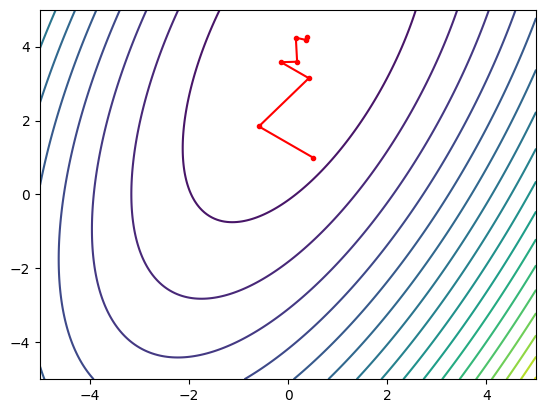

[0.37209719 4.25084931]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random

def sven_method(x0, h, f):
    left_f_x0, f_x0, rigth_f_x0 = f(x0 - h), f(x0), f(x0 + h)
    if left_f_x0 >= f_x0 <= rigth_f_x0:
        return (x0 - h, x0 + h)
    if left_f_x0 <= f_x0 >= rigth_f_x0:
        return None 
    if left_f_x0 >= f_x0 >= rigth_f_x0:
        x1 = x0 + h 
    if left_f_x0 <= f_x0 <= rigth_f_x0:
        x1 = x0 - h
        h = -h
    h *= 2
    while f(x1) < f(x0):
        tmp = x0 
        x0 = x1
        x1 = x0 + h
        h *= 2

    if h > 0:
        return(tmp, x1)
    return (x1, tmp)

def steepest_gradient_descent_method(x, e1, e2, M, f, plot=False,):
    dx = 0.0000001
    df = lambda x : grad_f(dx, x, f)
    array_dots = []
    k = 0
    g_f = df(x)
    while np.linalg.norm(g_f, ord=2)  >= e1 and k < M:
        t = f_t(x, g_f, f)
        tmp = x
        x = x - t * g_f
        if plot:
            array_dots.append(x.copy())
        if np.linalg.norm(x - tmp, ord=2) < e2  and abs( f(x) - f(tmp)) < e2:
            break
        k +=1
        g_f = df(x)
    return x
    


def grad_f(dx, x, f):
    array_x = []
    for i in range(len(x)):
        tmp  = x.copy()
        tmp[i] = tmp[i] - dx
        tmp2 = x.copy()
        tmp2[i] = tmp2[i] + dx
        array_x.append([tmp2, tmp])
    array_x = np.array(array_x)
    tmp = [(f(cloum[0]) - f(cloum[1])) / (2 * dx) for cloum in array_x]
    return np.array(tmp)
def dichotomy_method(E, l, f, a, b):

    while abs(a - b) > l:
        y = (a + b - E) / 2
        z = (a + b + E) / 2
        if f(y) > f(z):
            a = y
        else:
            b = z

    return (a + b) / 2
def f_t(x, g_f, f,):
    t = lambda t: f(x - g_f * t)
    E = 0.000000001
    l = 0.00001
    random.seed( version=2)
    h = random.uniform(0.1, 1000)
    x0 = random.uniform(-1000, 1000)
    segment = sven_method(x0, h, t)
    if segment:
        a, b = segment 
    ans = dichotomy_method(E, l, t, a, b)
    return ans

def Fletcher_Reeves_method(x0, e1, e2, M, f, plot=False):
    n = x0.size
    dx = 0.0000001
    df = lambda x : grad_f(dx, x, f)
    array_dots = []
    k = 1
    if plot:
        array_dots.append(x0.copy())
    x = steepest_gradient_descent_method(x0, e1, e2, 1, f)
    g_f = df(x)
    prev_x = x0
    d = -df(x0)
    prev_g_f = -d
    if plot:
        array_dots.append(x.copy())
    if np.linalg.norm(x - x0, ord=2) < e2  and abs( f(x) - f(x0)) < e2:
        return x
    while np.linalg.norm(g_f, ord=2)  >= e1 and k < M:
        if  k % n:
            b = 0
        else:
            b = (np.linalg.norm(g_f, ord=2) / np.linalg.norm(prev_g_f, ord=2)) ** 2
        d = -g_f + b * d
        t = f_t(x, -d, f)
        prev_x = x
        prev_g_f = g_f
        x = x - t * g_f
        if plot:
            array_dots.append(x.copy())
        if np.linalg.norm(x - prev_x, ord=2) < e2  and abs(f(x) - f(prev_x)) < e2:
            break
        k +=1
        g_f = df(x)
      
    if plot:
        return x, array_dots
    return x



if __name__ == "__main__":
    n = 2
    dx = 0.0000001
    f = lambda x : (4 * x[0] - 2 * x[1] + 7) ** 2   + ( 2 * x[0] + x[1] - 5 ) ** 2  
    df = lambda x : grad_f(dx, x, f)
    x0 =[0.5, 1.0]
    x0 = np.array(x0)
    x = np.linspace(-5, 5, 200)
    y = np.linspace(-5, 5, 200)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels=20)

    g = df(x0)
    e1 = 0.1
    e2 = 0.15
    M = 10
    ans = Fletcher_Reeves_method(x0, e1, e2, M, f)
    plot = True
    if plot: 
    
        X = []
        Y = []

        ans, array_dots = Fletcher_Reeves_method(x0, e1, e2, M, f, plot)
        for x, y in array_dots:
            X.append(x)
            Y.append(y)
        

        ax.plot(X, Y, marker=".", c="r")
        plt.show()

    print(ans)

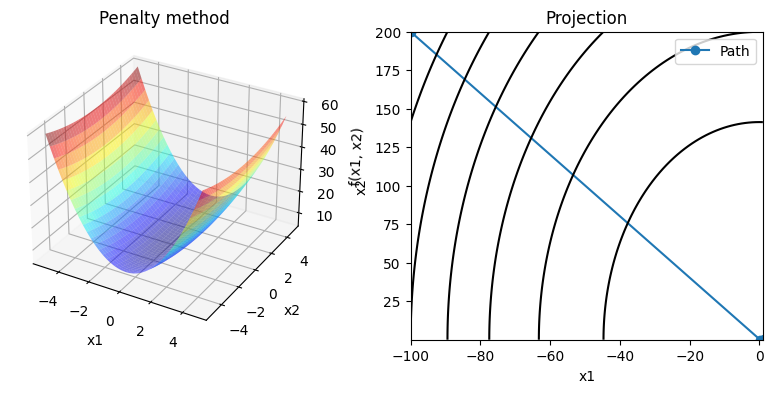

|f 		| x1_path  		| x2_path |
|28005.000 		|-100.000 		|200.000
|5.080 		|0.200 		|0.025


In [6]:
import matplotlib.pyplot as plt
import numpy as np

def P(x, r, equations, inequalities):
    sum_equations = np.sum([g(x) for g in equations]) ** 2
    array_g_x_inequalities = np.vectorize(lambda g, x: g(x), signature='(),(n)->()',)(inequalities, x)
    array_g_x_inequalities[array_g_x_inequalities < 0] = 0
    sum_inequalities = (array_g_x_inequalities ** 2).sum()
    ans = r / 2 * (sum_equations + sum_inequalities)
    return ans 

def step2(x, r, bind_P, f):
    e1 = 0.01
    e2 = 0.015
    M = 100
    F_Rm = lambda x, f : Fletcher_Reeves_method(x, e1, e2, M, f)
    F = lambda x: f(x) + bind_P(x, r)
    x = F_Rm(x, F)
    return x

def penalty_method(r, C, f, e, equations, inequalities):
    bind_P = lambda x, r: P(x, r, equations, inequalities)
    x = [-100, 200]
    x = np.array(x, dtype=float)
    x1_path = [x[0]]
    x2_path = [x[1]]
    x = step2(x, r, bind_P, f)
    x1_path.append(x[0])
    x2_path.append(x[1])
    r = r * C
    while abs(bind_P(x, r)) > e :
        x = step2(x, r, bind_P, f)
        x1_path.append(x[0])
        x2_path.append(x[1])
        r = r * C
    return x, x1_path, x2_path

if __name__ == "__main__":
    f = lambda x : 2 * x[0] ** 2 + x[1] ** 2/5 + 5
    equations = []
    inequalities = [ lambda x: x[0] + x[1] - 2, lambda x: -x[0] + 1]
    r = 1
    C = 10
    e = 0.000000000001
    ans, x1_path, x2_path = penalty_method(r, C, f , e, equations, inequalities)

    fig = plt.figure(figsize=(10,4))

    ax1 = fig.add_subplot(121, projection='3d')
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = f([X,Y])
    ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('f(x1, x2)')
    ax1.set_title('Penalty method')

    ax2 = fig.add_subplot(122)
    ax2.plot(x1_path, x2_path, '-o', label='Path')
    ax2.legend()
    ax2.set_xlabel('x1')
    ax2.set_ylabel('x2')
    ax2.set_title('Projection')
    x1 = np.linspace(min(x1_path), max(x1_path), 100)
    x2 = np.linspace(min(x2_path), max(x2_path), 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f([X1,X2])
    ax2.contour(X1, X2, Z, colors='black')


    plt.show()

    print("|f \t\t| x1_path  \t\t| x2_path |")
    for i in range(len(ans)):
        print(f"|{f([x1_path[i], x2_path[i]]):.3f} \t\t|{x1_path[i]:.3f} \t\t|{x2_path[i]:.3f}")


In [7]:
# Построить таблицу
